In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Loading the dataset

In [2]:
df=pd.read_csv('Titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

float64(2): Age, Fare
int64(5): PassengerId, Survived, Pclass, Sibsp,Parch
object(5): Name, Sex, Ticket, Cabin, Embarked

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [7]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.Survived.unique()

array([0, 1], dtype=int64)

In [10]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

passenger survive(1) or died(0)

In [11]:
df.isnull().sum()   # checking missing value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Univariate Variable Analysis

Categorical Variable: Name, Sex, Ticket, Cabin, Embarked, Survived,Pclass,Sibsp, Parch
Numerical Variable: Age, Fare, PassengerId

Categorical Variable

In [12]:
def bar_plot(variable):
    """input: variable ex:"Sex"
       output: barplot & value count"""
   #get feature 
    var = df[variable]
    
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualization
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))

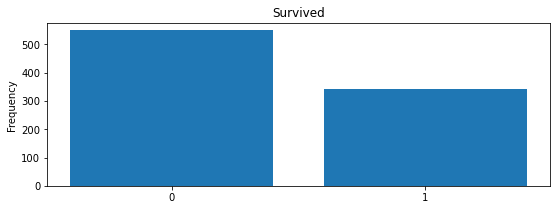

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


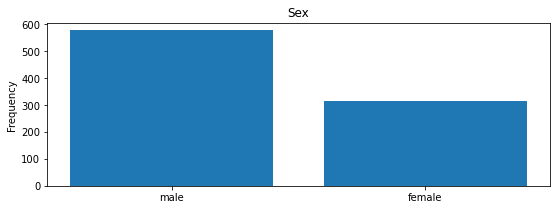

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


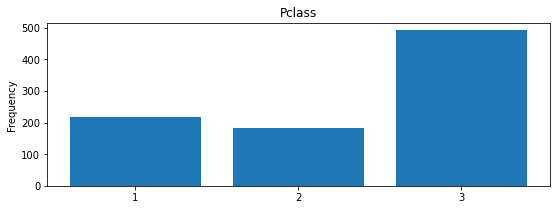

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


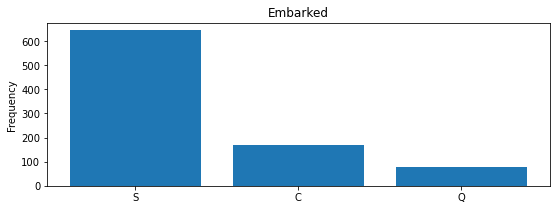

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


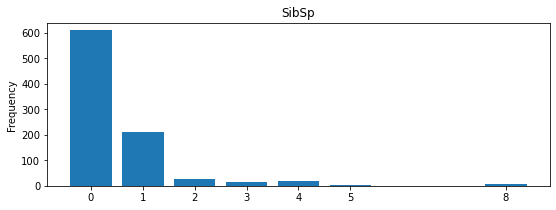

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


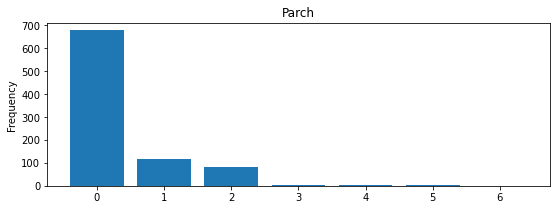

Parch: 
 0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


In [13]:
categories1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for category in categories1:
    bar_plot(category)

#### Numerical Variable

In [14]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

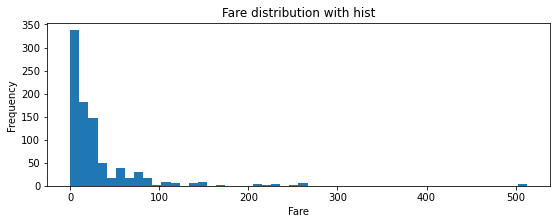

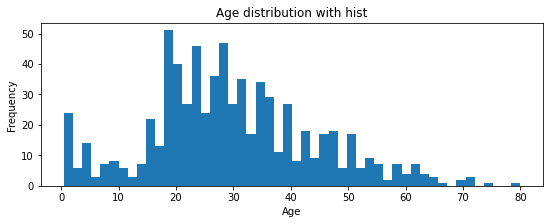

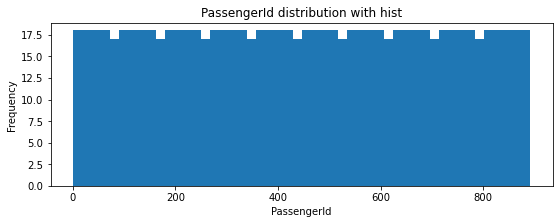

In [15]:
numericVar = ["Fare", "Age", "PassengerId"]
for n in numericVar:
    plot_hist(n)

### Basic Data Analysis

In [16]:
# Pclass vs. Survived
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [17]:
# Sex vs. Survived
df[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [18]:
# SibSp vs. Survived
df[["SibSp", "Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [19]:
# Parch vs. Survived
df[["Parch", "Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Outlier Detection

In [20]:
from collections import Counter

In [21]:
def detect_outliers(df, features):
    outlier_indices = []
    
    for c in features:
        
    # 1st Quartile
        Q1 = np.percentile(df[c], 25)
    
    # 3rd Quartile
        Q3 = np.percentile(df[c], 75)
        
    # IQR = 3rdQuartile - 1stQuartile
        IQR = Q3 - Q1
    
    #Outlier Step 
        outlier_step = IQR * 1.5
        #detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step )].index
    
    #store indices
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2) #if an observation has the outliers more than 2,then that observation will extract the dataset.
    
    return multiple_outliers

In [22]:
df.loc[detect_outliers(df, ["Age", "SibSp", "Parch", "Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [23]:
#drop outliers
df = df.drop(detect_outliers(df, ["Age", "SibSp", "Parch", "Fare"]), axis = 0).reset_index(drop = True)

PassengerId       AxesSubplot(0.125,0.536818;0.110714x0.343182)
Survived       AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Pclass         AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Age            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
SibSp          AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Parch          AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Fare                 AxesSubplot(0.125,0.125;0.110714x0.343182)
dtype: object

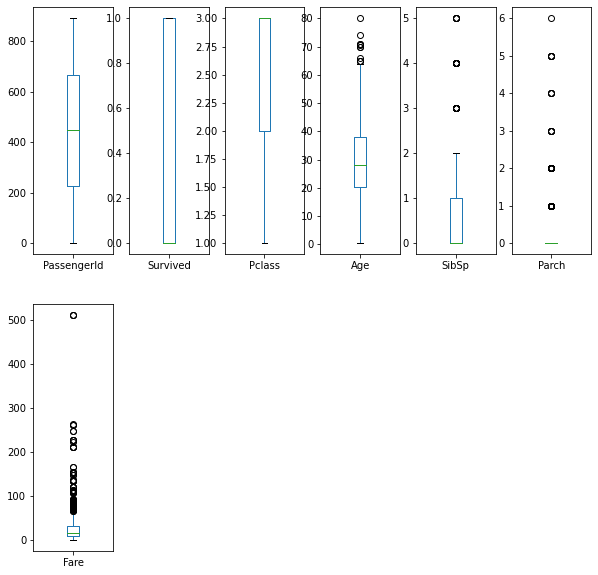

In [24]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

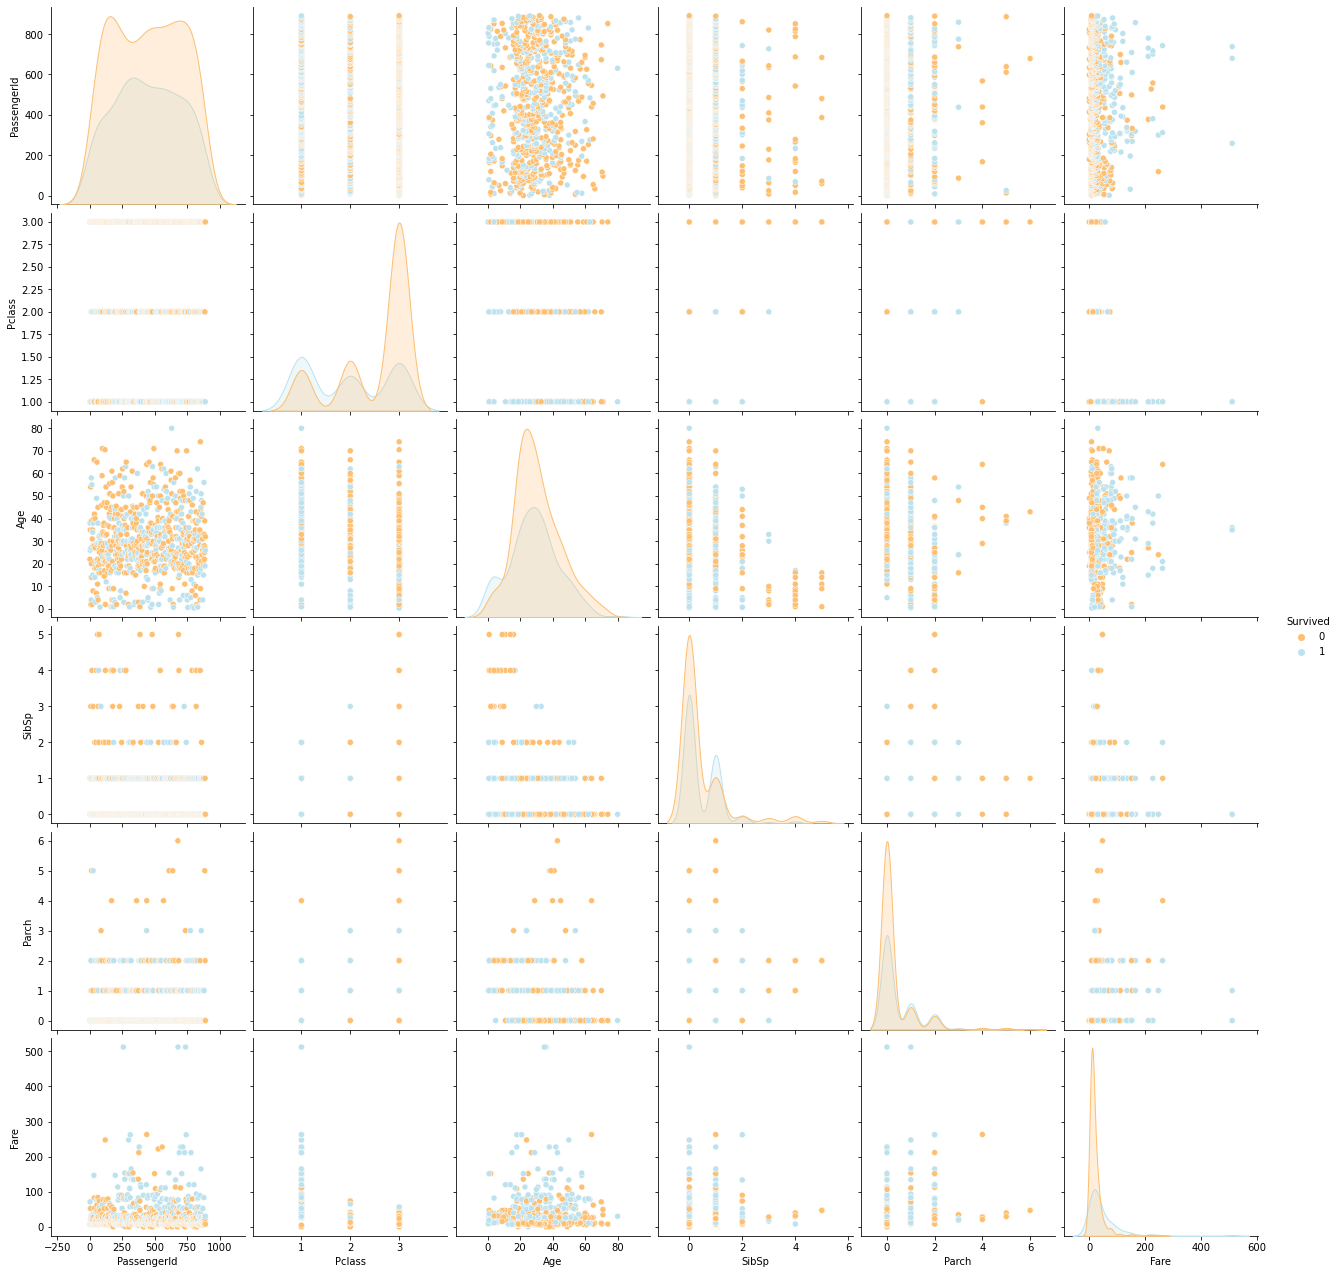

In [25]:
sns.pairplot(df,hue='Survived',palette='RdYlBu',size=3)
plt.show()

In [26]:
df.skew()

PassengerId   -0.008456
Survived       0.469460
Pclass        -0.627700
Age            0.383106
SibSp          2.692428
Parch          2.905431
Fare           5.058015
dtype: float64

<AxesSubplot:>

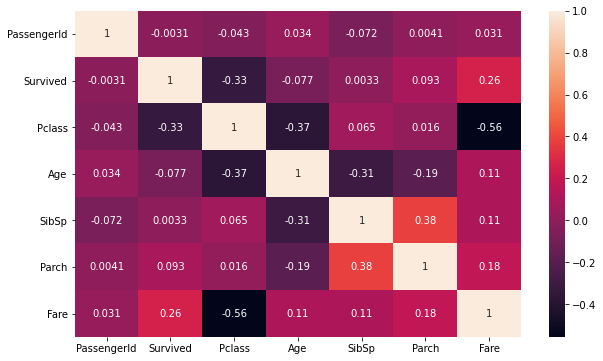

In [27]:
plt.figure(figsize=(10,6))                        #figure size
sns.heatmap(df.corr(),annot=True)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Fill missing value

Embarked has 2 missing value
Fare has only 1

In [29]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


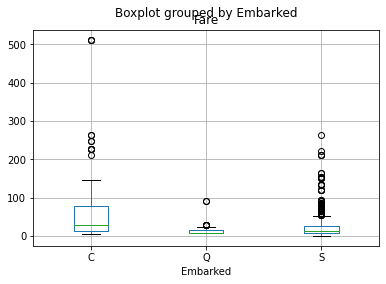

In [30]:
df.boxplot(column="Fare", by="Embarked")

plt.show()

In [31]:
df["Embarked"] = df["Embarked"].fillna("C")
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [32]:
df[df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [33]:
df["Fare"] = df["Fare"].fillna(np.mean(df[df["Pclass"]==3]["Fare"]))

In [34]:
df[df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [35]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         0
dtype: int64

### Removing outliers

In [36]:
label_encoder = preprocessing.LabelEncoder()

In [37]:
df['Survived']= label_encoder.fit_transform(df['Survived'])
 
df['Survived'].unique()

array([0, 1], dtype=int64)

In [38]:
df['Sex']= label_encoder.fit_transform(df['Sex'])
 
df['Sex'].unique()

array([1, 0])

In [39]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


### Visualization

Correlation Between SibSp -- Parch -- Age -- Fare -- Survived

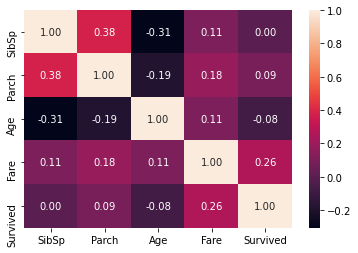

In [41]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

Fare feature seems to have a correlation with survived feature(0.26).

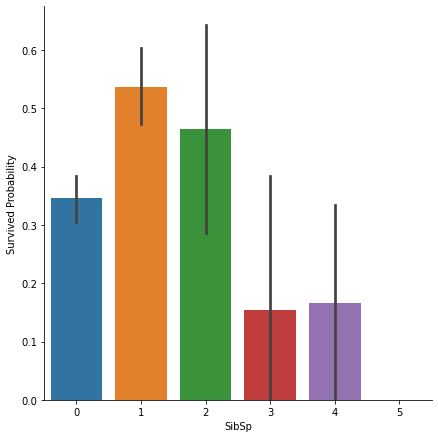

In [42]:
g = sns.factorplot(x = "SibSp", y = "Survived", data = df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

Having a lot of SibSp have less chance to survive
If SibSp == 0 or 1 or 2, passenger has more chance to survive
We can consider a new feature describing these categorie

#### Parch -- Survived

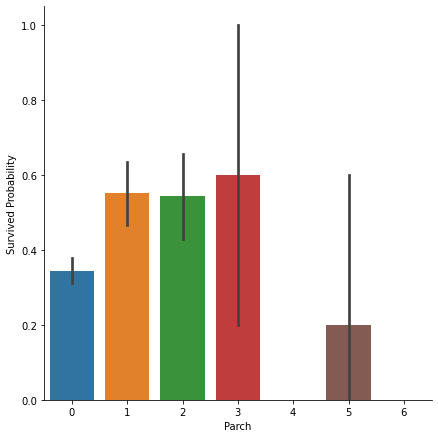

In [43]:
g = sns.factorplot(x = "Parch", y = "Survived", data = df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

SibSp and parch can be used for new feature extraction with threshold = 3
Small families have more chance to survive
There is std in surival of passenger with Parch = 3

#### Pclass -- Survived

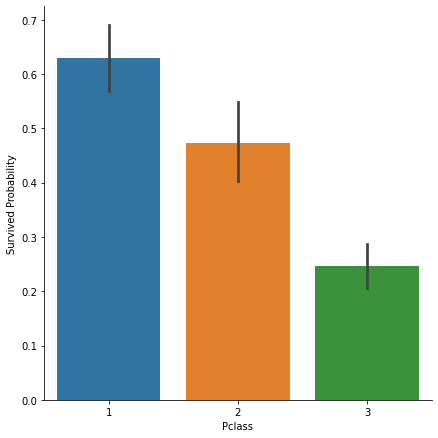

In [44]:
g = sns.factorplot(x = "Pclass", y = "Survived", data = df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

#### Age---Survived

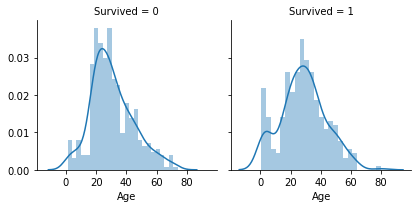

In [45]:
g = sns.FacetGrid(df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

#### Pclass -- Survived -- Age

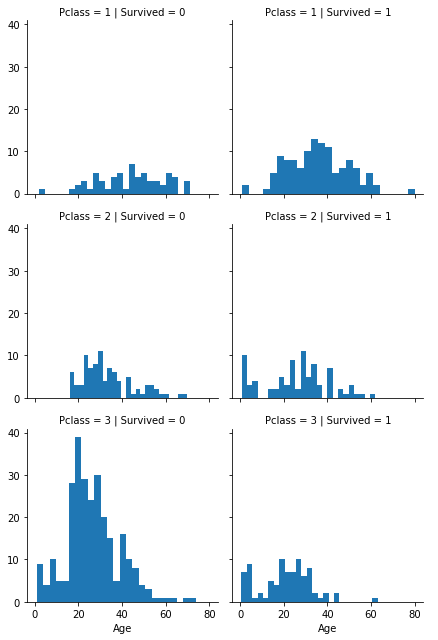

In [46]:
g = sns.FacetGrid(df, col = "Survived", row = "Pclass", size = 3)
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

Pclass is important feature for our model training.

#### Embarked -- Sex -- Pclass -- Survived

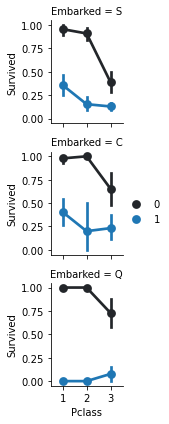

In [47]:
g = sns.FacetGrid(df, row = "Embarked", size = 2)
g.map(sns.pointplot, "Pclass","Survived","Sex")
g.add_legend()
plt.show()

Female passengers have much better survival rate than males.
Male passengers have better survival rate in pclass 3 in C.
Embarked and sex will be used in trainin

#### Embarked -- Sex -- Fare -- Survived

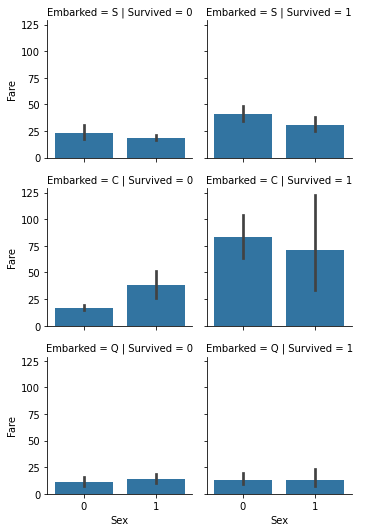

In [48]:
g = sns.FacetGrid(df, row = "Embarked", col = "Survived", size = 2.5)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

Passsengers who pay higher fare have better survival. Fare can be used as categorical for training

#### Fill Missing: Age Feature

In [49]:
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,NaN,C
27,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
840,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",0,NaN,1,0,17453,89.1042,C92,C
850,860,0,3,"Razi, Mr. Raihed",1,NaN,0,0,2629,7.2292,NaN,C
858,869,0,3,"van Melkebeke, Mr. Philemon",1,NaN,0,0,345777,9.5000,NaN,S
868,879,0,3,"Laleff, Mr. Kristo",1,NaN,0,0,349217,7.8958,NaN,S


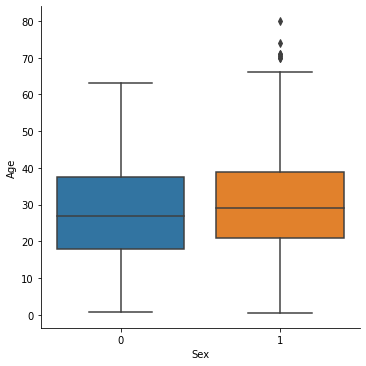

In [50]:
sns.factorplot(x = "Sex", y = "Age", data = df, kind = "box")
plt.show()

Sex is not informative for age prediction, age distribution seems to be same

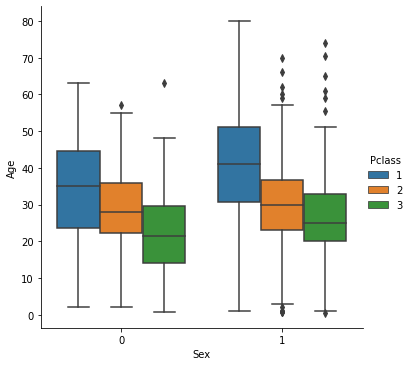

In [51]:
sns.factorplot(x = "Sex", y = "Age", hue = "Pclass",data = df, kind = "box")
plt.show()

1st class passengers are older than 2nd, and 2nd is older than 3rd class

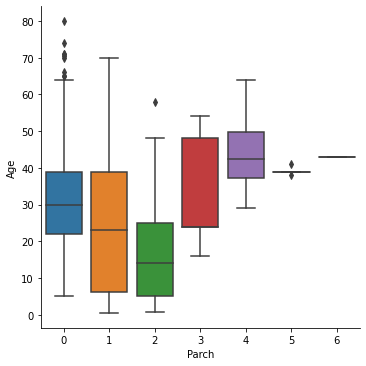

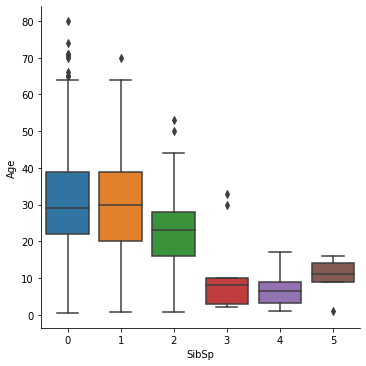

In [52]:
sns.factorplot(x = "Parch", y = "Age", data = df, kind = "box")
sns.factorplot(x = "SibSp", y = "Age", data = df, kind = "box")
plt.show()

We can not see the sex feature in the heatmap. Because sex feature does not have numerical data. We need to convert it to numerical data

In [53]:
df["Sex"] = [1 if i == "male" else 0 for i in df["Sex"]]

In [54]:
df["Sex"].head()

0    0
1    0
2    0
3    0
4    0
Name: Sex, dtype: int64

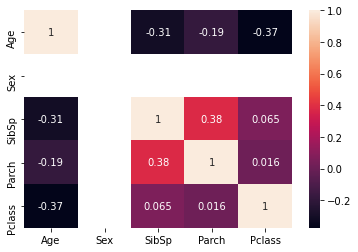

In [55]:
sns.heatmap(df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

Age is not correlated with sex but it is correlated with parch, sibsp and pclass.

In [56]:
# we write a code block for the age values which have the null

index_nan_age = list(df["Age"][df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = df["Age"][((df["SibSp"] == df.iloc[i]["SibSp"]) &(df["Parch"] == df.iloc[i]["Parch"])& (df["Pclass"] ==df.iloc[i]["Pclass"]))].median()
    age_med = df["Age"].median()
    if not np.isnan(age_pred):
        df["Age"].iloc[i] = age_pred
    else:
        df["Age"].iloc[i] = age_med

In [57]:
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Feature--Engineering

Whether people survive or not may have changed according to their titles. Here we will examine it

In [58]:
df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [59]:
name = df["Name"]
df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [60]:
df["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

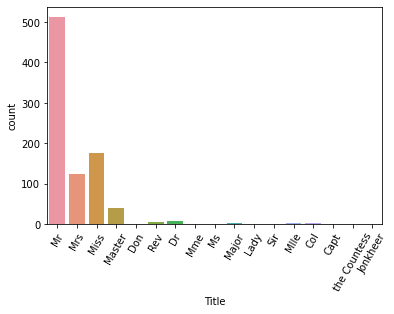

In [61]:
sns.countplot(x="Title", data = df)
plt.xticks(rotation = 60)
plt.show()

In [62]:
# convert to categorical
df["Title"] = df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in df["Title"]]
df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

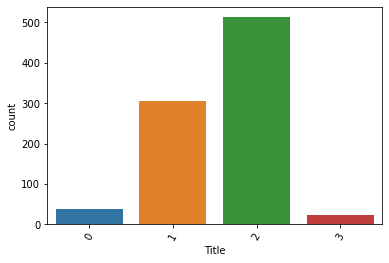

In [63]:
sns.countplot(x="Title", data = df)
plt.xticks(rotation = 60)
plt.show()

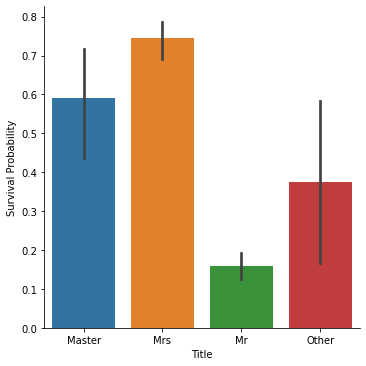

In [64]:
g = sns.factorplot(x = "Title", y = "Survived", data = df, kind = "bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [65]:
df.drop(labels = ["Name"], axis = 1, inplace = True)

In [66]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,2


In [67]:
df = pd.get_dummies(df,columns=["Title"])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


### Family Size

In [68]:
# we used +1 for the person herself
df["Fsize"] = df["SibSp"] + df["Parch"] + 1

In [69]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


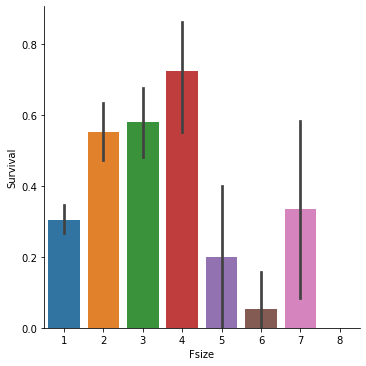

In [70]:
g = sns.factorplot(x = "Fsize", y = "Survived", data = df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [71]:
df["family_size"] = [1 if i < 5 else 0 for i in df["Fsize"]]

In [72]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1


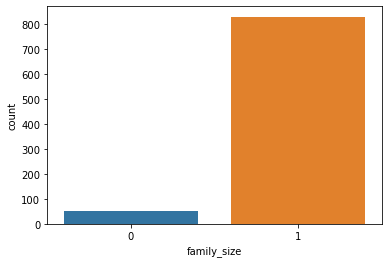

In [73]:
sns.countplot(x = "family_size", data = df)
plt.show()

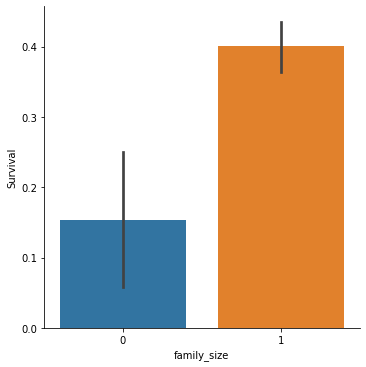

In [74]:
g = sns.factorplot(x = "family_size", y = "Survived", data = df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

Small familes have more chance to survive than large families.

In [76]:
df = pd.get_dummies(df, columns= ["family_size"])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,0,1
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,0,1
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,0,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,0,1
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,1


### Embarked

In [77]:
df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

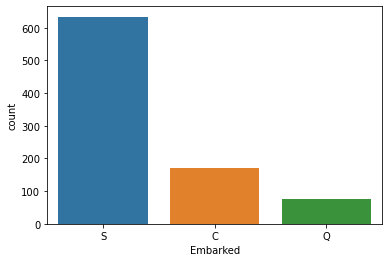

In [78]:
sns.countplot(x = "Embarked", data = df)
plt.show()

In [79]:
df = pd.get_dummies(df, columns=["Embarked"])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


### Ticket

In [80]:
df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [81]:
a = "A/5. 2151"
a.replace(".","").replace("/","").strip().split(" ")[0]

'A5'

In [82]:
tickets = []
for i in list(df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
df["Ticket"] = tickets

In [83]:
df["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [84]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,A5,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1,1,0,38.0,1,0,PC,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1,3,0,26.0,0,0,STONO2,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1,1,0,35.0,1,0,x,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0,3,0,35.0,0,0,x,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


In [85]:
df = pd.get_dummies(df, columns= ["Ticket"], prefix = "T")
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x
0,1,0,3,0,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,0,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,0,1,0,0,0,0
3,4,1,1,0,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0,3,0,26.0,0,0,8.4583,NaN,0,...,0,0,0,0,0,0,0,0,0,1
6,7,0,1,0,54.0,0,0,51.8625,E46,0,...,0,0,0,0,0,0,0,0,0,1
7,8,0,3,0,2.0,3,1,21.0750,NaN,1,...,0,0,0,0,0,0,0,0,0,1
8,9,1,3,0,27.0,0,2,11.1333,NaN,0,...,0,0,0,0,0,0,0,0,0,1
9,10,1,2,0,14.0,1,0,30.0708,NaN,0,...,0,0,0,0,0,0,0,0,0,1


### Pclass

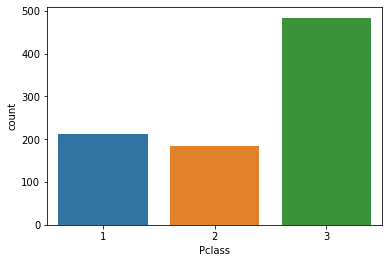

In [86]:
sns.countplot(x = "Pclass", data = df)
plt.show()

In [87]:
df["Pclass"] = df["Pclass"].astype("category")
df = pd.get_dummies(df, columns= ["Pclass"])
df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0,0,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,0,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1,0,26.0,0,0,7.9250,NaN,0,1,...,0,0,1,0,0,0,0,0,0,1
3,4,1,0,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0,0,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1


### Sex

In [118]:
df["Sex"] = df["Sex"].astype("category")
df = pd.get_dummies(df, columns=["Sex"])
df.head()

KeyError: 'Sex'

### Drop Passenger ID and Cabin

In [117]:
df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

KeyError: "['PassengerId' 'Cabin'] not found in axis"

In [90]:
df.columns

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0',
       'Title_1', 'Title_2', 'Title_3', 'Fsize', 'family_size_0',
       'family_size_1', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A4',
       'T_A5', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa',
       'T_LINE', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA4', 'T_SCAH', 'T_SCOW',
       'T_SCPARIS', 'T_SCParis', 'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2',
       'T_SOTONOQ', 'T_SP', 'T_STONO', 'T_STONO2', 'T_SWPP', 'T_WC', 'T_WEP',
       'T_x', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

### Modeling

In [120]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Train - Test Split

In [119]:
df_len=len(df)

In [99]:
df_len

881

In [100]:
test = df[df_len:]
test.drop(labels = ["Survived"],axis = 1, inplace = True)

In [101]:
test.head()

,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,...,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0


In [103]:
train = df[:df_len]
X_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 590
X_test 291
y_train 590
y_test 291
test 0


### Simple Logistic Regression

In [105]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 82.88
Testing Accuracy: % 82.47


### Decision Tree Classifier

In [109]:
dtc=DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
pred2=dtc.predict(X_test)
print('Accuracy score of',dtc,'is:')
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

Accuracy score of DecisionTreeClassifier(max_depth=5) is:
0.8247422680412371
[[155  21]
 [ 30  85]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       176
           1       0.80      0.74      0.77       115

    accuracy                           0.82       291
   macro avg       0.82      0.81      0.81       291
weighted avg       0.82      0.82      0.82       291



### Random Forest Classifier

In [110]:
rf=RandomForestClassifier(random_state=33)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
pred3=rf.predict(X_test)
print('Accuracy score of',rf,'is:')
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(classification_report(y_test,pred3))

Accuracy score of RandomForestClassifier(random_state=33) is:
0.8213058419243986
[[152  24]
 [ 28  87]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       176
           1       0.78      0.76      0.77       115

    accuracy                           0.82       291
   macro avg       0.81      0.81      0.81       291
weighted avg       0.82      0.82      0.82       291



### KNN Classification

In [111]:
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)
kn.score(X_train,y_train)
pred4=kn.predict(X_test)
print('Accuracy score of',kn,'is:')
print(accuracy_score(y_test,pred4))
print(confusion_matrix(y_test,pred4))
print(classification_report(y_test,pred4))

Accuracy score of KNeighborsClassifier() is:
0.6735395189003437
[[127  49]
 [ 46  69]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       176
           1       0.58      0.60      0.59       115

    accuracy                           0.67       291
   macro avg       0.66      0.66      0.66       291
weighted avg       0.68      0.67      0.67       291



### Hyperparameter Tuning -- Grid Search -- Cross Validation

In [124]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
            RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}



rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

In [125]:
logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [127]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8355932203389831
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8457627118644069
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8203389830508474
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7576271186440677


Text(0.5, 1.0, 'Cross Validation Scores')

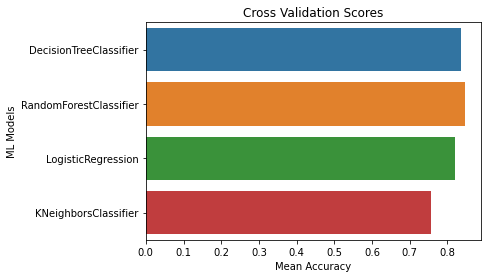

In [128]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

In [135]:
final_mod=RandomForestClassifier(bootstrap=False,criterion='entropy',max_depth=10,max_features='auto')
final_mod.fit(X_train,y_train)
pred=final_mod.predict(X_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.8213058419243986


In [131]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [140]:
y_pred_prob=final_mod.predict_proba(X_test)[:,1]

In [141]:
y_pred_prob

array([0.85415981, 0.81826673, 0.09127866, 0.15502182, 0.42977207,
       0.98592828, 0.17528117, 0.63713791, 0.82549106, 0.08307583,
       0.09160995, 0.0145125 , 0.97377273, 0.19222853, 0.14968511,
       0.37116207, 0.9744785 , 0.89577973, 0.99592828, 0.13560498,
       0.85718303, 0.09372786, 0.64155187, 0.49159392, 0.39932874,
       0.78136404, 0.70056433, 0.1276112 , 0.05694135, 0.9200798 ,
       0.0740138 , 0.12718396, 0.05722828, 0.05858159, 0.12540644,
       0.23912215, 0.32528845, 0.15310176, 0.08282277, 0.19766447,
       0.45412596, 0.0903385 , 0.07782797, 0.83284699, 0.07887581,
       0.35397005, 0.07782797, 0.04749185, 0.18216606, 0.19078152,
       0.08102285, 0.08618077, 0.99397863, 0.98037374, 0.07531849,
       0.45614695, 0.69054056, 0.47486855, 0.05644806, 0.0874909 ,
       0.98347316, 0.11147915, 0.96121267, 0.11345273, 0.80372042,
       0.76563084, 0.25274146, 0.98299704, 0.11583873, 0.15206107,
       0.98337374, 0.80244225, 0.02015789, 0.12858333, 0.05344

In [142]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

0.8010375494071146


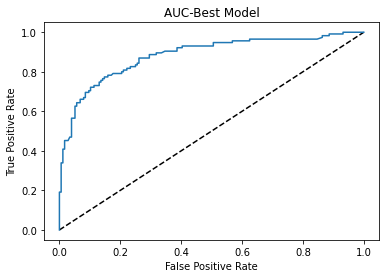

In [144]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Best Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-Best Model')
auc_score=roc_auc_score(y_test,final_mod.predict(X_test))
print(auc_score)

### Saving the Model

In [149]:
import joblib
joblib.dump(final_mod,'Titanic.obj')
mod_from_joblib=joblib.load('Titanic.obj')

In [152]:
mod_from_joblib=joblib.load('Titanic.obj')
